### Codio Activity 22.6: Using a Neural Net for Non-concentric Data

**Expected Time = 60 minutes** 

**Total Points = 20** 

This activity focuses on using a neural network to classify a dataset that does not have an obvious linear boundary.  An important idea about the neural net is its ability to solve such problems with high accuracy.  The dataset you will use is created using scikit-learn, and is meant to mimic that from the videos.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-07-13 05:25:52.492672: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 05:25:52.496102: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 05:25:52.505222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 05:25:52.519263: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 05:25:52.523464: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 05:25:52.535540: I tensorflow/core/platform/cpu_feature_gu

### The Data

Below, a dataset is manufactured to have four centers, and these are then combined to form a binary classification problem.  The data is created and visualized below using the `make_blobs` function.

In [2]:
X, y = make_blobs(
    [50, 50, 50, 50], centers=[[0, 5], [5, 0], [5, 5], [0, 0]], random_state=42
)

In [3]:
y[(y == 0) | (y == 1)] = 1
y[(y == 2) | (y == 3)] = 0

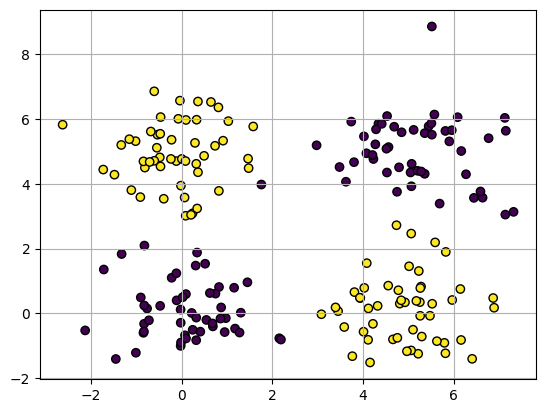

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")
plt.grid()

[Back to top](#-Index)

### Problem 1

#### The Network Architecture

**10 Points**

Below, create a model named `model` that builds a `keras` network with the `Sequential` model and appropriate architecture to acheive better than 90% accuracy on the entire dataset.  Assign the trained model to the `history` variable as before.

In [5]:
0.9649999737739563

0.9649999737739563

In [39]:
### GRADED
tf.random.set_seed(42)
model = Sequential(
    [
        Dense(10, activation="tanh"),
        Dense(1, activation="sigmoid"),
    ]
)
tf.random.set_seed(42)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

tf.random.set_seed(42)
history = model.fit(x=X, y=y, epochs=20, batch_size=10, verbose=0)

### ANSWER CHECK
print(history.history["acc"][-1])

0.9649999737739563


[Back to top](#-Index)

### Problem 2

#### How many epochs are necessary

**10 Points**

An important consideration is not wasting energy in over training your data.  Based on a visualization of your loss function, was there a point of diminishing returns?  If so, can you identify it?  Assign your answer for what you believe an optimal number of epochs for training as `epochs`.  Below is an example of a model trained for 1000 epochs on the current dataset.

![](images/overtrain.png)

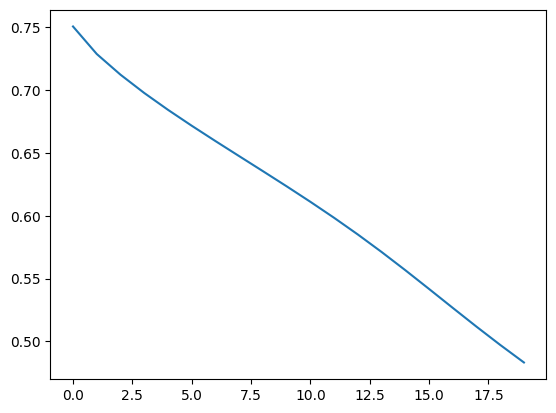

In [7]:
plt.plot(history.history["loss"])

In [8]:
### GRADED
epochs = 20

### ANSWER CHECK
print(epochs)

20


[Back to top](#-Index)

### Problem 3 (non-graded)

#### Draw a Decision Boundary

As an extra exercise, create a visualization of the networks decision boundary by creating a grid of points, making predictions based on these points, and using the `countourf` plot in `matplotlib`.  